# API de NASA : ‘ Asteroids - NeoWs ’

¿ Te gustaría obtener información de los asteroides más cercanos a la Tierra en el día que tú elijas ?
¡ Consulta este notebook !

In [1]:
### PAQUETES
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:

url_0 = 'https://api.nasa.gov/neo/rest/v1/feed'
api_key = 'eWATYcDEyawFe5yslLcnTT9U9j73auf3jOIhEfGw'
keep_on = "yes"
contador = 0
url_list = []

## Bucle while que nos permite introducir todas las ventanas temporales que queramos
while keep_on == "yes":

    if contador == 0:

        start = input('Introduzca fecha de inicio en formato YYYY-MM-DD')
        respuesta = input('Introduzca "yes" si quiere establecer una fecha fin .\r Introduzca "no" para fijarlo en el standard de 7 días hacia delante')

        if respuesta == 'yes':
            end = input('Introduzca fecha fin (de forma predeterminada solo pueden ser 7 días hacia delante a partir de fecha de inicio)')

            url = url_0 +'?start_date=' + start +'?end_date=' + end + '&api_key=' + api_key
            url_list.append(url)

        elif respuesta == 'no':

            url = url_0 +'?start_date=' + start + '&api_key=' + api_key
            url_list.append(url)

        contador+=1
    
    else:
        
        start = input('Introduzca fecha de inicio en formato YYYY-MM-DD')
        respuesta = input('Introduzca "yes" si quiere establecer una fecha fin .\r Introduzca "no" para fijarlo en el standard de 7 días hacia delante')

        if respuesta == 'yes':
            end = input('Introduzca fecha fin (de forma predeterminada solo pueden ser 7 días hacia delante a partir de fecha de inicio)')
 
            url= url_0 +'?start_date=' + start +'?end_date=' + end + '&api_key=' + api_key
            url_list.append(url)

        elif respuesta == 'no':

            url= url_0 +'?start_date=' + start + '&api_key=' + api_key
            url_list.append(url)

    keep_on = input('Introduzca "yes" si quiere introducir otro intervalo de días. Introduzca "no" para obtener datos del intervalo/s temporal/es introducido/s anteriormente')


## Listas vacías
list_ID = []
list_Nombre = []
list_Magnitud_Absoluta = []
list_Peligro = []
list_Diametro_Min = []
list_Diametro_Max = []
list_Fecha_mayor_acercamiento = []
list_Velocidad_Relativa = []
list_Distancia = []
list_Centinela = []
list_Fecha = []
list_Hora = []
list_Year = []
list_Mes = []
list_Mes_0 = []
list_Dia = []
list=[]

## Función para redondear atributos cuantitativos a 2 decimales
def redondear_2_decimales (numero_string):
    return round ( float (numero_string), 2 )

# Bucle que recorre todas las urls como las ventanas temporales que haya introducido el usuario
for url in url_list:

    datos = urllib.request.urlopen(url).read().decode()
    js = json.loads(datos)

    for fecha in js['near_earth_objects']:

        for objeto in js['near_earth_objects'][fecha]:
        
            list_ID.append(objeto['id'])
            list_Nombre.append(objeto['name'])
            list_Magnitud_Absoluta.append(objeto['absolute_magnitude_h'])
            list_Peligro.append(objeto['is_potentially_hazardous_asteroid'])
            list_Diametro_Max.append(redondear_2_decimales (objeto['estimated_diameter']['kilometers']['estimated_diameter_max'] ))
            list_Diametro_Min.append(redondear_2_decimales (objeto['estimated_diameter']['kilometers']['estimated_diameter_min'] ))
            list_Fecha_mayor_acercamiento.append(objeto['close_approach_data'][0]['close_approach_date_full'])
            list_Velocidad_Relativa.append(redondear_2_decimales (objeto['close_approach_data'][0]['relative_velocity']['kilometers_per_hour']))
            list_Distancia.append(redondear_2_decimales (objeto['close_approach_data'][0]['miss_distance']['astronomical']))
            list_Centinela.append(objeto['is_sentry_object'])

    ## Bucle para dividir el campo fecha en año, mes, dia y hora
    for fecha_full in list_Fecha_mayor_acercamiento:

        fecha,hora = fecha_full.split(' ')
        list_Dia.append(fecha.split('-')[2])
        list_Mes.append(fecha.split('-')[1])
        list_Year.append(fecha.split('-')[0])
        list_Hora.append(hora)

    list_Fecha_mayor_acercamiento = []


## Preparamos listas para crear un diccionario con la información de los registros
list_of_lists = [list_ID, list_Nombre,list_Year,list_Mes,list_Dia, list_Hora, list_Distancia,list_Magnitud_Absoluta,  list_Diametro_Min, list_Diametro_Max, list_Velocidad_Relativa, list_Peligro, list_Centinela]    
atributos = ['ID','Nombre','Año','Mes','Dia_Max_Acercamiento','Hora_Max_Acercamiento','Distancia_UA','Magnitud_Absoluta','Diametro_Min_km','Diametro_Max_km','Velocidad_Relativa_kmh','Peligro','Centinela']

## Generamos diccionario
dicc={}
for i,j in zip(atributos, list_of_lists):
    dicc[i] = j

In [3]:
## Le pasamos el diccionario a pandas para crear un DataFrame
df = pd.DataFrame(dicc)
df

,ID,Nombre,Año,Mes,Dia_Max_Acercamiento,Hora_Max_Acercamiento,Distancia_UA,Magnitud_Absoluta,Diametro_Min_km,Diametro_Max_km,Velocidad_Relativa_kmh,Peligro,Centinela
0,2277617,277617 (2006 BT7),2023,Sep,08,03:47,0.34,18.360,0.57,1.26,62872.90,False,False
1,2340291,340291 (2006 CV),2023,Sep,08,05:42,0.11,19.910,0.28,0.62,63408.57,False,False
2,2481965,481965 (2009 EB1),2023,Sep,08,15:39,0.40,20.690,0.19,0.43,66112.72,False,False
3,3513745,(2010 FL48),2023,Sep,08,07:56,0.33,22.090,0.10,0.23,53314.79,False,False
4,3771014,(2017 EU2),2023,Sep,08,09:23,0.33,25.300,0.02,0.05,63737.88,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,54202343,(2021 TQ1),2023,Sep,21,05:58,0.50,28.090,0.01,0.01,73403.16,False,False
178,54244535,(2022 CT),2023,Sep,21,06:28,0.49,25.730,0.02,0.04,30802.24,False,False
179,54310136,(2022 SD29),2023,Sep,21,05:47,0.22,26.480,0.01,0.03,37868.08,False,False
180,54359399,(2023 KK1),2023,Sep,21,01:09,0.20,20.200,0.24,0.54,48124.11,True,False


## Gráficos

In [4]:
## Segmentamos en asteroides Peligrosos (P) y No Peligrosos (NP)
df_ast_peligroso = df[df['Peligro']==True]
df_ast_no_peligroso = df[df['Peligro']==False]

Conclusiones extraídas del gráfico:
a mayor velocidad y mayores dimensiones, mayor probabilidad de que un asteroide sea clasificado como peligroso,
sin embargo no son características determinantes ya que existen otros factores como la trayectoria de la órbita del asteroide
Por esa razón vemos que conforme aumentan la velocidad y dimensiones, no implica que haya más concentración de asteroides peligrosos.
Además vemos que lo más común es que tanto las dimensiones como las velocidades tiendan a valores bajos en la mayoría de asteroides

Aclaración ---> los extremos de las líneas rectas del gráfico marcan los puntos de dimensiones mínima y máxima estimadas para el diamétro del asteroide,
a mayores dimensiones, mayor es el error que se comete en esa estimación, y por tanto más larga es la línea


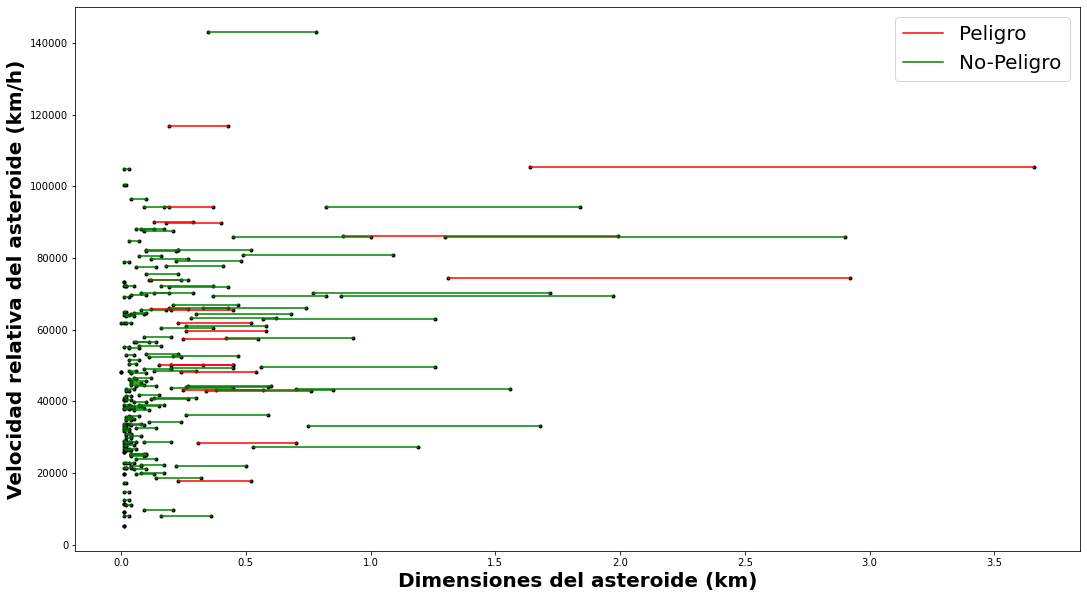


Conclusiones similares se pueden obtener para el gráfico de Dimensiones vs Distancia a la Tierra y relación con la marca de peligrosidad


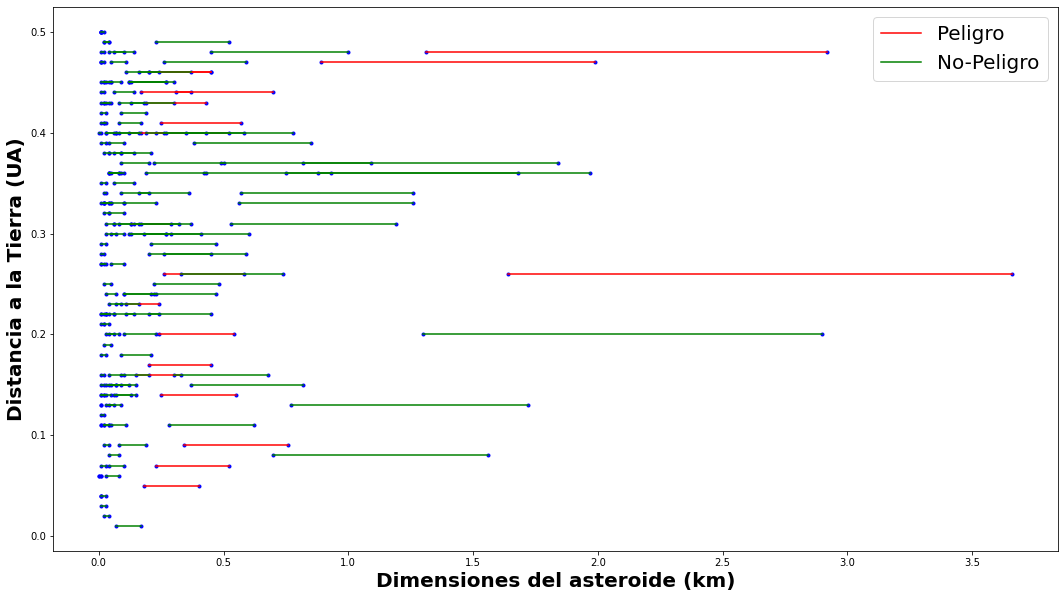

In [6]:
print('Conclusiones extraídas del gráfico:\na mayor velocidad y mayores dimensiones, mayor probabilidad de que un asteroide sea clasificado como peligroso,\nsin embargo no son características determinantes ya que existen otros factores como la trayectoria de la órbita del asteroide\nque en general suele tener más importancia.\rPor esa razón vemos que conforme aumentan la velocidad y dimensiones, no implica que haya más concentración de asteroides peligrosos.\nAdemás vemos que lo más común es que tanto las dimensiones como las velocidades tiendan a valores bajos en la mayoría de asteroides') 
print('\nAclaración ---> los extremos de las líneas rectas del gráfico marcan los puntos de dimensiones mínima y máxima estimadas para el diamétro del asteroide,\na mayores dimensiones, mayor es el error que se comete en esa estimación, y por tanto más larga es la línea')

## Gráfico 1 ---> Velocidad y dimensiones
#########################################
plt.figure(figsize=(18,10))


# pintamos asteroides calificados como peligrosos (P)
x_diametro_P = [ df_ast_peligroso['Diametro_Max_km'], df_ast_peligroso['Diametro_Min_km']]
y_velocidad_P = [ df_ast_peligroso['Velocidad_Relativa_kmh'], df_ast_peligroso['Velocidad_Relativa_kmh']]
plt.scatter(x_diametro_P,y_velocidad_P,marker='.',color='black')
plt.plot(x_diametro_P,y_velocidad_P, color='red')
plt.plot(x_diametro_P[0].iloc[0],y_velocidad_P[0].iloc[0], color='red', label='Peligro')

# pintamos asteroides calificados como no peligrosos (NP)
x_diametro_NP = [ df_ast_no_peligroso['Diametro_Max_km'], df_ast_no_peligroso['Diametro_Min_km']]
y_velocidad_NP = [ df_ast_no_peligroso['Velocidad_Relativa_kmh'], df_ast_no_peligroso['Velocidad_Relativa_kmh']]
plt.scatter(x_diametro_NP,y_velocidad_NP,marker='.',color='black')
plt.plot(x_diametro_NP,y_velocidad_NP, color='green')
plt.plot(x_diametro_NP[0].iloc[0],y_velocidad_NP[0].iloc[0], color='green', label='No-Peligro')

# Etiqueta los ejes
plt.xlabel('Dimensiones del asteroide (km)', size=20, fontweight='bold')
plt.ylabel('Velocidad relativa del asteroide (km/h)', size=20, fontweight='bold')
plt.legend(fontsize=20)
plt.show()

print('\nConclusiones similares se pueden obtener para el gráfico de Dimensiones vs Distancia a la Tierra y relación con la marca de peligrosidad')

## Gráfico 2 ---> Distancia y dimensiones
#########################################
plt.figure(figsize=(18,10))

# pintamos asteroides calificados como peligrosos (P)
x_diametro_P = [ df_ast_peligroso['Diametro_Max_km'], df_ast_peligroso['Diametro_Min_km']]
y_distancia_P = [ df_ast_peligroso['Distancia_UA'], df_ast_peligroso['Distancia_UA']]
plt.scatter(x_diametro_P,y_distancia_P,marker='.',color='blue')
plt.plot(x_diametro_P,y_distancia_P, color='red')
plt.plot(x_diametro_P[0].iloc[0],y_distancia_P[0].iloc[0], color='red', label='Peligro')

# pintamos asteroides calificados como no peligrosos (NP)
x_diametro_NP = [ df_ast_no_peligroso['Diametro_Max_km'], df_ast_no_peligroso['Diametro_Min_km']]
y_distancia_NP = [ df_ast_no_peligroso['Distancia_UA'], df_ast_no_peligroso['Distancia_UA']]
plt.scatter(x_diametro_NP,y_distancia_NP,marker='.',color='blue')
plt.plot(x_diametro_NP,y_distancia_NP, color='green')
plt.plot(x_diametro_NP[0].iloc[0],y_distancia_NP[0].iloc[0], color='green', label='No-Peligro')

# Etiqueta los ejes
plt.xlabel('Dimensiones del asteroide (km)', size=20, fontweight='bold')
plt.ylabel('Distancia a la Tierra (UA)', size=20, fontweight='bold')
plt.legend(fontsize=20)
plt.show()

## Guardado de tabla 'NASA_API' en base de datos

In [7]:
''' creamos una base de datos donde guardar nuestra tabla 'NASA' en formato SQL'''
nombre_bd = 'base_de_datos.db'
nombre_df = 'NASA_API'

conexion = sqlite3.connect( nombre_bd )
df.to_sql(nombre_df, conexion, if_exists='replace')
conexion.close()

In [8]:
'''cuando queramos acceder a ella simplemente nos conectamos introduciendo su nombre'''
conexion = sqlite3.connect('base_de_datos.db')
tabla = pd.read_sql('SELECT * FROM NASA_API', conexion)
tabla

,index,ID,Nombre,Año,Mes,Dia_Max_Acercamiento,Hora_Max_Acercamiento,Distancia_UA,Magnitud_Absoluta,Diametro_Min_km,Diametro_Max_km,Velocidad_Relativa_kmh,Peligro,Centinela
0,0,2277617,277617 (2006 BT7),2023,Sep,08,03:47,0.34,18.360,0.57,1.26,62872.90,0,0
1,1,2340291,340291 (2006 CV),2023,Sep,08,05:42,0.11,19.910,0.28,0.62,63408.57,0,0
2,2,2481965,481965 (2009 EB1),2023,Sep,08,15:39,0.40,20.690,0.19,0.43,66112.72,0,0
3,3,3513745,(2010 FL48),2023,Sep,08,07:56,0.33,22.090,0.10,0.23,53314.79,0,0
4,4,3771014,(2017 EU2),2023,Sep,08,09:23,0.33,25.300,0.02,0.05,63737.88,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,177,54202343,(2021 TQ1),2023,Sep,21,05:58,0.50,28.090,0.01,0.01,73403.16,0,0
178,178,54244535,(2022 CT),2023,Sep,21,06:28,0.49,25.730,0.02,0.04,30802.24,0,0
179,179,54310136,(2022 SD29),2023,Sep,21,05:47,0.22,26.480,0.01,0.03,37868.08,0,0
180,180,54359399,(2023 KK1),2023,Sep,21,01:09,0.20,20.200,0.24,0.54,48124.11,1,0


## QUERIES

### Top 5 asteroides más cercanos a la Tierra

In [9]:
query_1 = '''  SELECT ID, Nombre, Distancia_UA , Diametro_Min_km, Diametro_Max_km, Velocidad_Relativa_kmh
               FROM NASA_API
               ORDER BY Distancia_UA
               LIMIT 5    '''

pd.read_sql(query_1, conexion)

,ID,Nombre,Distancia_UA,Diametro_Min_km,Diametro_Max_km,Velocidad_Relativa_kmh
0,3754267,(2016 LY48),0.01,0.07,0.17,38996.82
1,3547771,(2010 TE),0.02,0.02,0.04,21452.38
2,54144931,(2021 JA5),0.03,0.01,0.03,39070.34
3,54016433,(2020 GE),0.04,0.01,0.01,5210.71
4,3767315,(2017 BY32),0.04,0.01,0.03,12446.26


### Top 5 asteroides más cercanos a la Tierra que tengan marca de 'Peligro'

In [10]:
query   = '''  SELECT ID, Nombre, Distancia_UA, Peligro,Diametro_Min_km, Diametro_Max_km, Velocidad_Relativa_kmh
               FROM NASA_API
               WHERE Peligro = True
               ORDER BY Distancia_UA
               LIMIT 5   '''

pd.read_sql(query, conexion)

,ID,Nombre,Distancia_UA,Peligro,Diametro_Min_km,Diametro_Max_km,Velocidad_Relativa_kmh
0,2523598,523598 (2003 ED50),0.05,1,0.18,0.40,89916.85
1,2523950,523950 (1998 SZ27),0.07,1,0.23,0.52,61901.01
2,3013662,(1998 QK28),0.09,1,0.34,0.76,42831.86
3,3550042,(2010 UY6),0.14,1,0.25,0.55,57528.60
4,3614639,(2012 UR138),0.16,1,0.15,0.33,50233.37


### Valor medio de dimensiones para asteroides clasificados como peligrosos y para los no peligrosos

In [12]:
query   = '''  SELECT AVG ((Diametro_Max_km + Diametro_Min_km)/2) AS Dimension_Media_Asteroides_No_Peligrosos
               FROM NASA_API
               WHERE Peligro = False  '''

query_2   = '''  SELECT AVG ((Diametro_Max_km + Diametro_Min_km)/2) AS Dimension_Media_Asteroides_Peligrosos
               FROM NASA_API
               WHERE Peligro = True  '''

print('Dimension_Media_Asteroides_No_Peligrosos:',pd.read_sql(query, conexion)['Dimension_Media_Asteroides_No_Peligrosos'][0], 'UA')
print('Dimension_Media_Asteroides_Peligrosos:',pd.read_sql(query_2, conexion)['Dimension_Media_Asteroides_Peligrosos'][0], 'UA')

Dimension_Media_Asteroides_No_Peligrosos: 0.19173913043478272 UA
Dimension_Media_Asteroides_Peligrosos: 0.5854761904761905 UA
